# Redes Recurrentes Bidireccionales

### Cargamos los paquetes e importamos los datos


In [4]:
pip install fsspec

     |████████████████████████████████| 134 kB 5.3 MB/s 


In [6]:
pip install gcsfs

     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 144 kB 36.2 MB/s 
     |████████████████████████████████| 271 kB 39.3 MB/s 
     |████████████████████████████████| 94 kB 1.8 MB/s 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [7]:
# df_mini = pd.read_csv('../texto_limpio.csv', index_col = 'Unnamed: 0')
df_mini = pd.read_csv('gs://tfm_aideas_datasets/texto_limpio.csv', index_col = 'Unnamed: 0')
df_mini

,ticker,date,body,r_adj,label,texto_limpio
6,ANA,2021-01-07 08:29:03.000,"El Ibex 35 ha tocado por momentos los 8.400, n...",0.050625,1,ibex 35 tocado momentos niveles veía marzo ini...
7,ANA,2021-01-07 10:28:03.000,"El presidente de Estados Unidos, Joe Biden, se...",0.012283,1,presidente joe hecho control dos cámaras congr...
8,ANA,2021-01-07 12:21:00.000,"MADRID, 7 Ene. (EUROPA PRESS) - El Ibex 35 caí...",0.012283,1,7 ibex 35 caía media sesión llevaba selectivo ...
9,ANA,2021-01-07 14:35:00.000,"HUELVA, 7 Ene. (EUROPA PRESS) - Las obras de a...",0.012283,1,7 obras adecuación desdoble carretera acceso m...
10,ANA,2021-01-07 15:28:06.000,El asalto al capitolio no ha asus...,0.012283,1,asalto capitolio asustado principales índices ...
...,...,...,...,...,...,...
53473,TEF,2021-12-30 06:13:41.000,"“Todos tendrán su baja, tal y como se ha hecho...",-0.019280,-1,tal hecho principio mensaje tranquilizador dab...
53474,TEF,2021-12-30 08:27:05.000,La última sesión del año en la Bolsa española ...,-0.019280,-1,última sesión año bolsa española transcurrido ...
53475,TEF,2021-12-30 08:31:09.000,17:46La Comunidad Valenciana notifica 10.889 n...,-0.019280,-1,comunidad valenciana notifica nuevos contagios...
53476,TEF,2021-12-30 08:52:26.000,19:12Compromís pide a Ximo Puig «evaluar todas...,-0.019280,-1,pide ximo puig todas posibles frente coronavir...


In [8]:
lb = LabelEncoder()
labels = lb.fit_transform(df_mini.label)

In [9]:
token = RegexpTokenizer(r'[a-zA-ZÀ-ÿ0-9]+')
cv = CountVectorizer(lowercase=True, ngram_range = (1,1), tokenizer = token.tokenize)

In [10]:
cv.fit(df_mini['texto_limpio'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[a-zA-ZÀ-ÿ0-9]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)>)

In [11]:
cv.vocabulary_

{'ibex': 45497,
 '35': 804,
 'tocado': 84122,
 'momentos': 57942,
 'niveles': 60356,
 'veía': 88039,
 'marzo': 55560,
 'inicio': 47953,
 'impulso': 46518,
 'wall': 89358,
 'animado': 7267,
 'después': 28553,
 'sdemócratas': 77652,
 'ganaran': 41428,
 'ayer': 11483,
 'elecciones': 32154,
 'senado': 78162,
 'ee': 31806,
 'uu': 86902,
 'celebradas': 17238,
 'georgia': 42008,
 'partido': 63672,
 'joe': 50556,
 'biden': 13225,
 'garantizara': 41506,
 'control': 22683,
 'ambas': 6570,
 'selectivo': 78017,
 'español': 35621,
 'cerró': 17611,
 'alza': 6417,
 'quedó': 70208,
 'mientras': 57116,
 'posibilidad': 66874,
 'aprueben': 8532,
 'nuevos': 60832,
 'paquetes': 63306,
 'estímulo': 36522,
 'aún': 11704,
 'mayores': 55924,
 'tono': 84312,
 'street': 80903,
 'apuntaló': 8567,
 'subidas': 81047,
 'resto': 74760,
 'bolsas': 13876,
 'bolsa': 13875,
 'estadounidense': 36014,
 'récords': 76528,
 'tres': 85432,
 'principales': 68235,
 'banca': 12029,
 'vuelto': 89214,
 'impulsar': 46500,
 'hoy': 45

In [12]:
len(cv.vocabulary_)

90720

In [13]:
X = df_mini.loc[:,'texto_limpio'].apply(lambda x : [cv.vocabulary_.get(s, 0) for s in x.split(' ')])
X

6        [45497, 804, 84122, 57942, 60356, 88039, 55560...
7        [67887, 50556, 44040, 22683, 30885, 25010, 214...
8        [1368, 45497, 804, 17032, 56076, 78540, 53405,...
9        [1368, 61083, 3545, 27598, 16471, 2537, 58734,...
10       [9580, 16074, 10188, 68235, 90621, 14795, 3671...
                               ...                        
53473    [82445, 44040, 68241, 56488, 84827, 25158, 555...
53474    [90700, 78540, 11686, 13875, 35622, 84886, 663...
53475    [20667, 87069, 60652, 60832, 22264, 23260, 875...
53476    [65506, 89800, 69732, 84149, 66894, 40645, 232...
53477    [60652, 16664, 23260, 31361, 20667, 87069, 676...
Name: texto_limpio, Length: 21341, dtype: object

In [14]:
X.values

array([list([45497, 804, 84122, 57942, 60356, 88039, 55560, 47953, 46518, 89358, 7267, 28553, 77652, 41428, 11483, 32154, 78162, 31806, 86902, 17238, 42008, 63672, 50556, 13225, 41506, 22683, 6570, 78017, 35621, 17611, 6417, 70208, 57116, 66874, 8532, 60832, 63306, 36522, 11704, 55924, 84312, 89358, 80903, 8567, 81047, 74760, 13876, 13875, 36014, 17611, 76528, 85432, 68235, 12029, 89214, 46500, 45100, 76583, 81048, 85127, 23685, 76013, 68196, 12096, 81493, 15214, 87219, 85944, 79453, 6463, 52850, 70017, 90620, 17156, 56359, 45074, 17037, 41423, 28575, 30103, 78903, 41387, 81048, 25352, 87720, 57415, 90365, 68235, 47248, 36970, 22181, 78886, 64542, 17035, 60739, 40645, 21214, 22164, 17020, 69605, 31349, 19843, 10799, 60350, 6338, 153, 63570, 78065, 79450, 40645, 60647, 89203, 22683, 78162, 70208, 34219, 9580, 43127, 63667, 85721, 86366, 44929, 78081, 15972, 89396, 26180, 24447, 89358, 80903, 7994, 48127, 46569, 54948, 26588, 16074, 30952, 50600, 39438, 11483, 78540, 59582, 75112, 47616,

In [15]:
np.unique(labels)

array([0, 1])

In [16]:
lens = [len(v) for v in X.values]
lens

[332,
 401,
 141,
 212,
 291,
 148,
 116,
 91,
 360,
 409,
 257,
 200,
 278,
 195,
 126,
 282,
 139,
 250,
 972,
 330,
 341,
 391,
 400,
 400,
 362,
 205,
 209,
 182,
 130,
 265,
 390,
 197,
 343,
 217,
 559,
 311,
 345,
 189,
 353,
 390,
 177,
 1294,
 489,
 421,
 288,
 155,
 181,
 175,
 154,
 203,
 188,
 157,
 343,
 1033,
 401,
 141,
 291,
 250,
 149,
 196,
 145,
 145,
 233,
 385,
 305,
 164,
 137,
 282,
 137,
 137,
 138,
 138,
 227,
 105,
 360,
 409,
 119,
 101,
 115,
 133,
 241,
 261,
 274,
 111,
 262,
 227,
 236,
 143,
 149,
 135,
 246,
 282,
 350,
 209,
 342,
 265,
 187,
 155,
 189,
 227,
 187,
 118,
 334,
 155,
 99,
 152,
 123,
 186,
 139,
 79,
 154,
 154,
 153,
 531,
 504,
 223,
 372,
 878,
 401,
 220,
 343,
 1033,
 425,
 917,
 178,
 334,
 85,
 122,
 122,
 383,
 65,
 133,
 241,
 598,
 261,
 315,
 145,
 165,
 115,
 446,
 392,
 139,
 262,
 227,
 1014,
 206,
 230,
 42,
 401,
 35,
 194,
 129,
 59,
 123,
 165,
 108,
 174,
 63,
 151,
 114,
 151,
 231,
 381,
 184,
 64,
 13,
 122,
 178,

(array([2.524e+03, 8.493e+03, 5.267e+03, 3.049e+03, 1.226e+03, 4.120e+02,
        1.030e+02, 1.010e+02, 3.000e+01, 3.300e+01, 2.500e+01, 1.700e+01,
        6.000e+00, 9.000e+00, 0.000e+00, 1.000e+00, 1.000e+01, 3.000e+00,
        5.000e+00]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
 <a list of 19 Patch objects>)

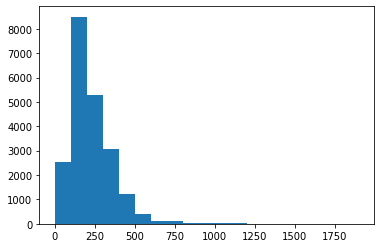

In [17]:
plt.hist(lens, bins=np.arange(0,2000,100))

In [18]:
np.mean(lens)

230.76069537509957

In [19]:
# Cortamos el texto a partir de un numero determinado de palabras
# max_features = 20000
max_features = 90720
# maxlen = 100
maxlen = 250
batch_size = 128

In [20]:
from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, Flatten
from sklearn.model_selection import train_test_split


print('Cargando los datos...')
x_train, x_test, y_train, y_test = train_test_split(
            X.values, labels, test_size=0.33
        )

Cargando los datos...


In [21]:
x_train

array([list([595, 39342, 36014, 12049, 77309, 53336, 3372, 26037, 20433, 22684, 77309, 22156, 86742, 56298, 61458, 70075, 3998, 46362, 57257, 31375, 57257, 34323, 61545, 20433, 1207, 57257, 2577, 70709, 39456, 22181, 84151, 66845, 67301, 31375, 86088, 33428, 870, 31375, 61557, 67301, 61463, 74120, 68168, 74582, 67301, 18310, 2585, 62227, 77309, 22156, 86742, 63732, 58, 31375, 77309, 44752, 39342, 64093, 60575, 12049, 31163, 77309, 22156, 34845, 57257, 39342, 36014, 12049, 77309, 3989, 2577, 62228, 77309, 22156, 86742, 11704, 66864, 85353, 61458, 77908, 77937, 63819, 21887, 41087, 39342, 77309, 44752, 86742, 2311, 77309, 22156, 21710, 3791, 77309, 22156, 86742, 60469, 19974, 35630, 48652, 21706, 47206, 59917, 87205, 67081, 61973, 77309, 44752, 21710, 79001, 71767, 86569, 19974, 3054, 86363, 71775, 61458, 2581, 77309, 22156, 21710, 3791, 77309, 44752, 86742, 8428, 61973, 81463, 21055, 46808, 8425, 50855, 42492, 79373, 74403, 38847, 61973, 81463, 8425, 2581, 77309, 22156, 86742, 35725, 22

In [22]:
np.unique(y_train)

array([0, 1])

In [23]:
print(x_train.shape)
x_test.shape

(14298,)


(7043,)

### Preparación de los datos.


#### Partición de los datos en entrenamiento y test

Una vez tengamos la partición de los datos le vamos a añadir e padding.

PADDING: Es la misma idea que el padding en redes convolucionales. Vamos a añadir 0 a izquierda o derecha de los documentos para normalizar su longuitud.

Para este problema podemos utilizar la funcion de keras incluida en **sequences**; **pad_sequences**.


In [24]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

14298 train sequences
7043 test sequences
Pad sequences (samples x time)


In [25]:
x_train

array([[    0,     0,     0, ...,  2585,  8509, 11686],
       [    0,     0,     0, ..., 77682, 30162, 53573],
       [    0,     0,     0, ..., 87720, 74582, 36207],
       ...,
       [    0,     0,     0, ..., 27099, 46518, 18607],
       [    0,     0,     0, ..., 40645, 31373, 79412],
       [87960, 46988,  3233, ..., 23625, 33690, 40983]], dtype=int32)

In [26]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train shape: (14298, 250)
x_test shape: (7043, 250)


In [27]:
x_train

array([[    0,     0,     0, ...,  2585,  8509, 11686],
       [    0,     0,     0, ..., 77682, 30162, 53573],
       [    0,     0,     0, ..., 87720, 74582, 36207],
       ...,
       [    0,     0,     0, ..., 27099, 46518, 18607],
       [    0,     0,     0, ..., 40645, 31373, 79412],
       [87960, 46988,  3233, ..., 23625, 33690, 40983]], dtype=int32)

## Por último comparemos diferentes modelos

### Simple RNN


In [28]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_split=0.2)
print(model.summary())
model.evaluate(x_test, y_test)

Train...
Epoch 1/10
90/90 [==============================] - 39s 382ms/step - loss: 0.6987 - accuracy: 0.5139 - val_loss: 0.6905 - val_accuracy: 0.5189
Epoch 2/10
90/90 [==============================] - 36s 395ms/step - loss: 0.5430 - accuracy: 0.7627 - val_loss: 0.7738 - val_accuracy: 0.5147
Epoch 3/10
90/90 [==============================] - 34s 377ms/step - loss: 0.3597 - accuracy: 0.8445 - val_loss: 0.8115 - val_accuracy: 0.5339
Epoch 4/10
90/90 [==============================] - 33s 371ms/step - loss: 0.3138 - accuracy: 0.8538 - val_loss: 0.8685 - val_accuracy: 0.5178
Epoch 5/10
90/90 [==============================] - 34s 373ms/step - loss: 0.2874 - accuracy: 0.8571 - val_loss: 0.8906 - val_accuracy: 0.5276
Epoch 6/10
90/90 [==============================] - 34s 378ms/step - loss: 0.2739 - accuracy: 0.8635 - val_loss: 0.8807 - val_accuracy: 0.5220
Epoch 7/10
90/90 [==============================] - 33s 370ms/step - loss: 0.2687 - accuracy: 0.8622 - val_loss: 0.9057 - val_accurac

[0.9113529324531555, 0.5399687886238098]

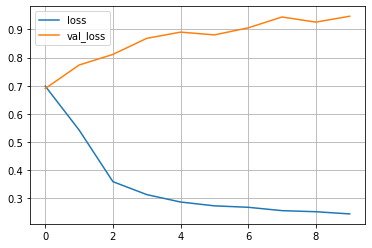

In [29]:
# plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

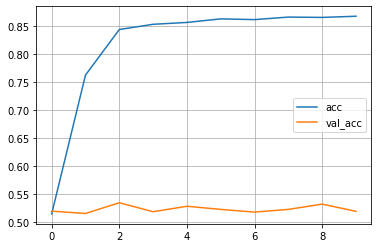

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.show()

#### LSTM

In [34]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_split=0.2)
model.summary()
model.evaluate(x_test, y_test)

Train...
Epoch 1/10
90/90 [==============================] - 13s 74ms/step - loss: 0.6924 - accuracy: 0.5110 - val_loss: 0.6906 - val_accuracy: 0.5259
Epoch 2/10
90/90 [==============================] - 5s 57ms/step - loss: 0.6228 - accuracy: 0.6709 - val_loss: 0.7234 - val_accuracy: 0.5357
Epoch 3/10
90/90 [==============================] - 5s 57ms/step - loss: 0.4415 - accuracy: 0.7888 - val_loss: 0.8498 - val_accuracy: 0.5283
Epoch 4/10
90/90 [==============================] - 5s 53ms/step - loss: 0.3327 - accuracy: 0.8358 - val_loss: 0.9616 - val_accuracy: 0.5332
Epoch 5/10
90/90 [==============================] - 5s 53ms/step - loss: 0.2821 - accuracy: 0.8423 - val_loss: 1.1747 - val_accuracy: 0.5346
Epoch 6/10
90/90 [==============================] - 5s 53ms/step - loss: 0.2534 - accuracy: 0.8543 - val_loss: 1.2833 - val_accuracy: 0.5308
Epoch 7/10
90/90 [==============================] - 5s 53ms/step - loss: 0.2426 - accuracy: 0.8535 - val_loss: 1.3393 - val_accuracy: 0.5273
Epo

[1.6657541990280151, 0.5565810203552246]

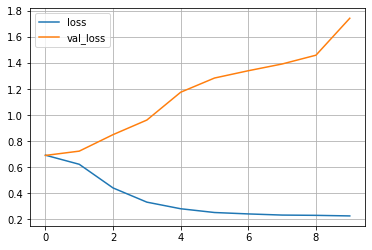

In [35]:
# plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

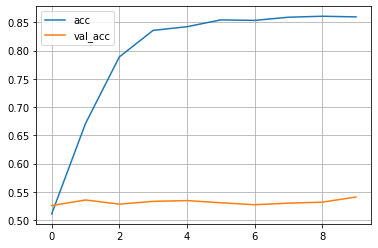

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.show()

#### Red Recurrente BiDireccional

In [37]:
# Aquí 

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_split=0.2)
print(model.summary())
model.evaluate(x_test, y_test)

Train...
Epoch 1/10
90/90 [==============================] - 84s 908ms/step - loss: 0.7064 - accuracy: 0.5101 - val_loss: 0.6897 - val_accuracy: 0.5273
Epoch 2/10
90/90 [==============================] - 70s 781ms/step - loss: 0.5958 - accuracy: 0.7127 - val_loss: 0.7337 - val_accuracy: 0.5220
Epoch 3/10
90/90 [==============================] - 68s 761ms/step - loss: 0.4058 - accuracy: 0.8290 - val_loss: 0.7949 - val_accuracy: 0.5406
Epoch 4/10
90/90 [==============================] - 69s 764ms/step - loss: 0.3219 - accuracy: 0.8508 - val_loss: 0.8193 - val_accuracy: 0.5486
Epoch 5/10
90/90 [==============================] - 70s 778ms/step - loss: 0.2939 - accuracy: 0.8580 - val_loss: 0.8409 - val_accuracy: 0.5360
Epoch 6/10
90/90 [==============================] - 70s 777ms/step - loss: 0.2787 - accuracy: 0.8591 - val_loss: 0.8620 - val_accuracy: 0.5364
Epoch 7/10
90/90 [==============================] - 70s 780ms/step - loss: 0.2601 - accuracy: 0.8668 - val_loss: 0.8845 - val_accurac

[0.8915020823478699, 0.5486298203468323]

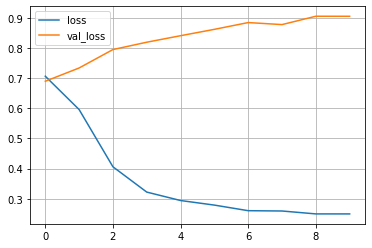

In [38]:
# plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

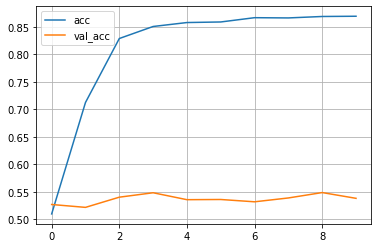

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.grid()
plt.show()